## RESEARCH QUESTION 2

To what extent past class failures might have an impact on alcohol consumption in students?

In [91]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scikitplot as skplt

from sklearn import set_config
set_config(transform_output = "pandas")

## Function to Save Figures

In [26]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [27]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')


In [28]:
X_train.columns


Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

## baseline classifier 0 R

In [29]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
X = X_train.drop(columns = 'alc')
y = X_train['alc']

In [30]:
xt = X_test.drop('avg_grade',axis=1)

In [31]:
dummy.fit(X,y)

DummyClassifier(strategy='most_frequent')

### 0r classifier accuray

In [32]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(X_train['alc'], dummy.predict(X)))
print('Test Accuracy', accuracy_score(X_test['alc'], 
                                      dummy.predict(xt)))

Train Accuracy 0.5
Test Accuracy 0.5502392344497608


In [33]:
# Separate target from dataset
y_train = X_train['alc']

y_test = X_test['alc']
X_test = X_test[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]



In [56]:

X_train = X_train[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']] 

In [34]:
y_train

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
887    1.0
888    1.0
889    1.0
890    1.0
891    1.0
Name: alc, Length: 892, dtype: float64

In [57]:
X_train.columns


Index(['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no',
       'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade'],
      dtype='object')

## KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [36]:
# Predicting Alcohol Consumption
y_pred = knn.predict(X_test)

In [37]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
204,1.0,1.0
205,1.0,1.0
206,0.0,1.0
207,0.0,0.0


In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.583732057416268


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.61      0.62       115
         1.0       0.54      0.55      0.54        94

    accuracy                           0.58       209
   macro avg       0.58      0.58      0.58       209
weighted avg       0.59      0.58      0.58       209



In [40]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,70,45
1,42,52


In [41]:
print('Train Accuracy ', accuracy_score(y_train, knn.predict(X_train) ))

Train Accuracy  0.6311659192825112


## DESCISION TREE

In [61]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [80]:
X_train= X_train[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
y_train=X_train['alc']
y_test=X_test['alc']
X_test= X_test[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]




KeyError: 'alc'

In [66]:
X_test.columns

Index(['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no',
       'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade'],
      dtype='object')

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(x, y)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))

Accuracy  0.579


Max Depth =  1 , Train Acc. =  0.583 , Test Acc. =  0.526
Max Depth =  2 , Train Acc. =  0.583 , Test Acc. =  0.526
Max Depth =  3 , Train Acc. =  0.609 , Test Acc. =  0.565
Max Depth =  4 , Train Acc. =  0.63 , Test Acc. =  0.617
Max Depth =  5 , Train Acc. =  0.654 , Test Acc. =  0.622
Max Depth =  6 , Train Acc. =  0.675 , Test Acc. =  0.632
Max Depth =  7 , Train Acc. =  0.688 , Test Acc. =  0.617
Max Depth =  8 , Train Acc. =  0.717 , Test Acc. =  0.632
Max Depth =  9 , Train Acc. =  0.744 , Test Acc. =  0.636
Max Depth =  10 , Train Acc. =  0.762 , Test Acc. =  0.608
Max Depth =  11 , Train Acc. =  0.78 , Test Acc. =  0.608
Max Depth =  12 , Train Acc. =  0.811 , Test Acc. =  0.55
Max Depth =  13 , Train Acc. =  0.833 , Test Acc. =  0.603
Max Depth =  14 , Train Acc. =  0.852 , Test Acc. =  0.608
Max Depth =  15 , Train Acc. =  0.872 , Test Acc. =  0.565
Max Depth =  16 , Train Acc. =  0.883 , Test Acc. =  0.598
Max Depth =  17 , Train Acc. =  0.891 , Test Acc. =  0.593
Max Depth

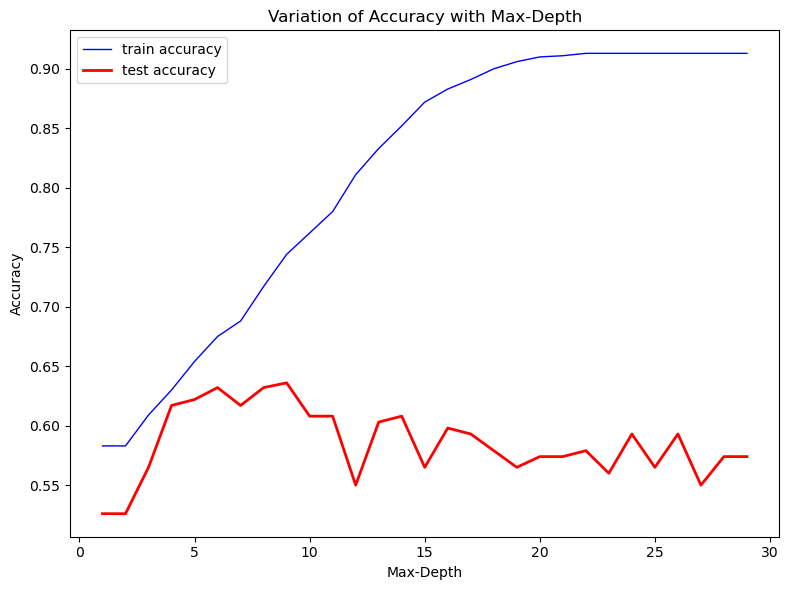

In [81]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

## Hyperparameter Tuning on KNN

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}


In [86]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(x,y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [87]:
best_grid = grid_search_knn.best_estimator_

In [88]:
best_grid

KNeighborsClassifier(n_neighbors=50)

[[75 40]
 [49 45]]
Accuracy Score 0.5741626794258373
Classification report:               precision    recall  f1-score   support

         0.0       0.60      0.65      0.63       115
         1.0       0.53      0.48      0.50        94

    accuracy                           0.57       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.57      0.57      0.57       209



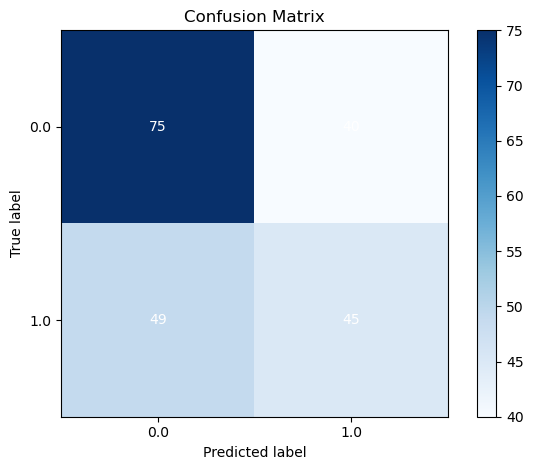

In [92]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## descision tree hyperparameter

In [93]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
    'max_features' : ['auto', 'sqrt']
}

In [94]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\nafis\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'max_features': ['auto', 'sqrt'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [96]:
best_grid = grid_search_dt.best_estimator_
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto')

[[87 28]
 [40 54]]
Accuracy Score 0.6746411483253588
Classification report:               precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       115
         1.0       0.66      0.57      0.61        94

    accuracy                           0.67       209
   macro avg       0.67      0.67      0.67       209
weighted avg       0.67      0.67      0.67       209



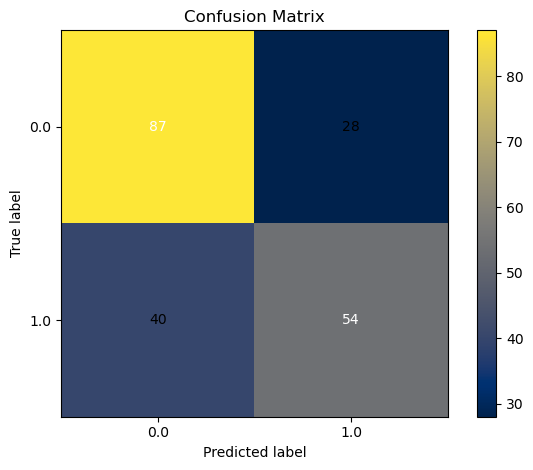

In [120]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred,cmap="cividis");
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Max Depth =  1 , Train Acc. =  0.583 , Test Acc. =  0.526
Max Depth =  2 , Train Acc. =  0.583 , Test Acc. =  0.526
Max Depth =  3 , Train Acc. =  0.609 , Test Acc. =  0.565
Max Depth =  4 , Train Acc. =  0.63 , Test Acc. =  0.617
Max Depth =  5 , Train Acc. =  0.657 , Test Acc. =  0.622
Max Depth =  6 , Train Acc. =  0.675 , Test Acc. =  0.632
Max Depth =  7 , Train Acc. =  0.688 , Test Acc. =  0.617
Max Depth =  8 , Train Acc. =  0.721 , Test Acc. =  0.627
Max Depth =  9 , Train Acc. =  0.744 , Test Acc. =  0.632
Max Depth =  10 , Train Acc. =  0.762 , Test Acc. =  0.603
Max Depth =  11 , Train Acc. =  0.783 , Test Acc. =  0.612
Max Depth =  12 , Train Acc. =  0.811 , Test Acc. =  0.56
Max Depth =  13 , Train Acc. =  0.834 , Test Acc. =  0.589
Max Depth =  14 , Train Acc. =  0.853 , Test Acc. =  0.584
Max Depth =  15 , Train Acc. =  0.872 , Test Acc. =  0.579
Max Depth =  16 , Train Acc. =  0.883 , Test Acc. =  0.589
Max Depth =  17 , Train Acc. =  0.892 , Test Acc. =  0.584
Max Dept

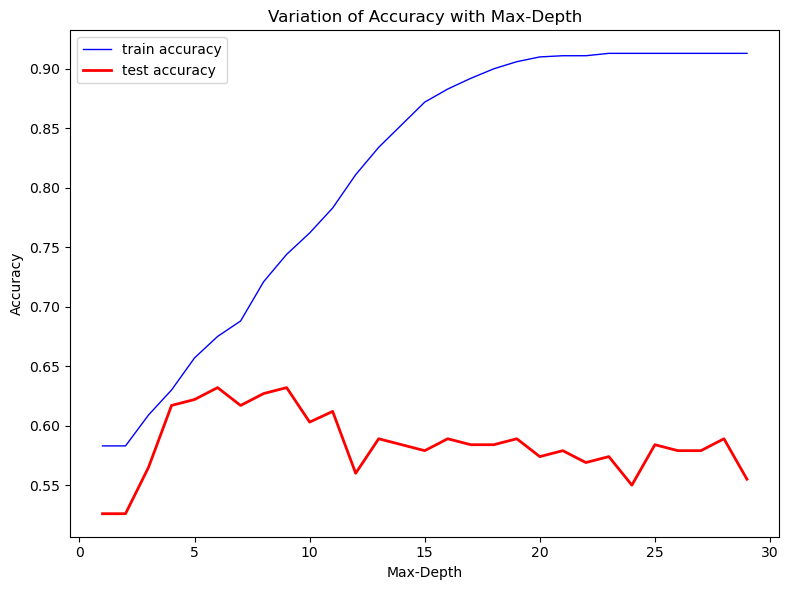

In [98]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

[[78 37]
 [47 47]]
0.5980861244019139
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65       115
         1.0       0.56      0.50      0.53        94

    accuracy                           0.60       209
   macro avg       0.59      0.59      0.59       209
weighted avg       0.60      0.60      0.60       209



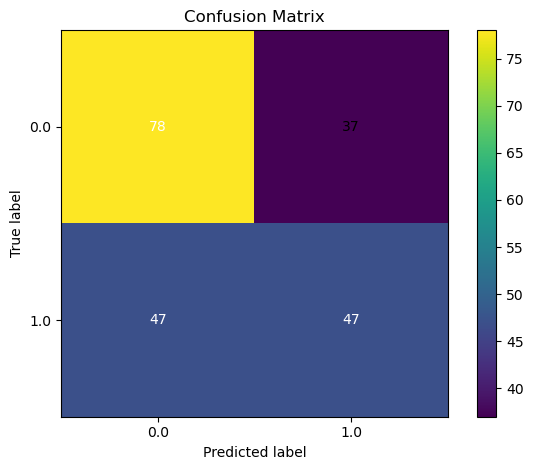

In [115]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
skplt.metrics.plot_confusion_matrix(y_test, prediction, cmap="viridis");
save_fig('Confusion Matrix for Random forest q3')
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

## Random Forest Hyperparameter tuned

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [103]:
param_grid= {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [105]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [106]:
# Finding out the best estimator
best_grid = grid_search_rf.best_estimator_
best_grid

RandomForestClassifier(criterion='log_loss', max_depth=10)

In [107]:
best_grid.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10)

In [108]:
best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[69 46]
 [47 47]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.60      0.60       115
         1.0       0.51      0.50      0.50        94

    accuracy                           0.56       209
   macro avg       0.55      0.55      0.55       209
weighted avg       0.55      0.56      0.55       209



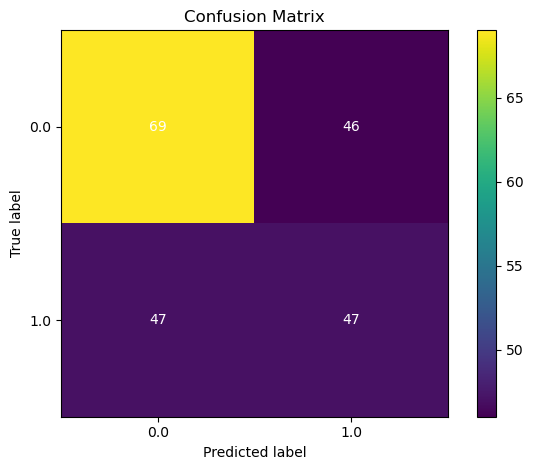

In [114]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred,cmap="viridis");


save_fig('Confusion Matrix for Random forest hyper-para tuned q3')

## ensemble learning

In [121]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard voting classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf)
    ], 
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [123]:
from sklearn.metrics import accuracy_score
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6076555023923444
RandomForestClassifier 0.6172248803827751
SVC 0.5789473684210527
VotingClassifier 0.6076555023923444


## Soft voting classifier

In [125]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability = True)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf)
    ], 
    voting = 'soft'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [126]:
from sklearn.metrics import accuracy_score
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6076555023923444
RandomForestClassifier 0.6172248803827751
SVC 0.5789473684210527
VotingClassifier 0.5933014354066986


## bagging and pasting

In [127]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [128]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

OOB Score 0.5291479820627802
Test Accuracy 0.5933014354066986


## impact of no. of estimators

In [129]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.6760089686098655  test acc =  0.6220095693779905 oob =  0.5829596412556054
Num of estimators:  100  train acc =  0.6760089686098655  test acc =  0.6028708133971292 oob =  0.5885650224215246
Num of estimators:  150  train acc =  0.6827354260089686  test acc =  0.5980861244019139 oob =  0.5975336322869955
Num of estimators:  200  train acc =  0.6804932735426009  test acc =  0.6124401913875598 oob =  0.600896860986547
Num of estimators:  250  train acc =  0.6782511210762332  test acc =  0.6076555023923444 oob =  0.594170403587444
Num of estimators:  300  train acc =  0.679372197309417  test acc =  0.5980861244019139 oob =  0.5896860986547086
Num of estimators:  350  train acc =  0.6771300448430493  test acc =  0.6028708133971292 oob =  0.5896860986547086
Num of estimators:  400  train acc =  0.6771300448430493  test acc =  0.5980861244019139 oob =  0.5863228699551569
Num of estimators:  450  train acc =  0.6771300448430493  test acc =  0.593301435406

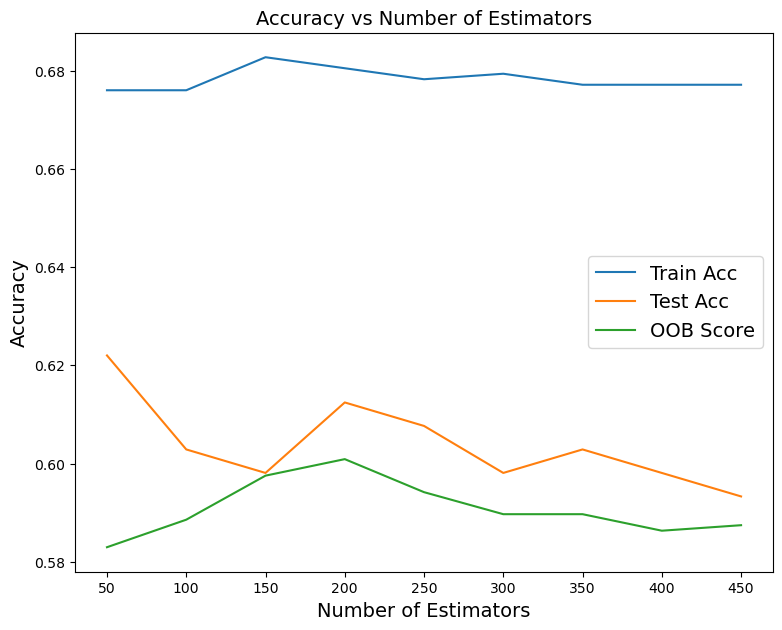

In [130]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [131]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.583732057416268

In [ ]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)